### Questions to answer:
Which train has the most delay.
To answer this question we use the columns Departure station, Arrival station, Number of late trains at departure, Average delay of late departing trains (min), Average delay of all departing trains (min), Number of trains late on arrival, Average delay of late arriving trains (min), Average delay of all arriving trains (min)

In [77]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Load data and show first 5 rows (all columns)
df = pd.read_csv('Regularities_by_liaisons_Trains_France.csv')
pd.set_option("display.max_columns", None)
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


In [60]:
# Filter the data needed
df_filtered = df[['Departure station',
                'Arrival station',
                'Number of late trains at departure',
                'Average delay of late departing trains (min)',
                'Average delay of all departing trains (min)',
                'Number of trains late on arrival',
                'Average delay of late arriving trains (min)',
                'Average delay of all arriving trains (min)']]
df_filtered.head()

,Departure station,Arrival station,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min)
0,ANGOULEME,PARIS MONTPARNASSE,191.0,3.576353,2.678273,41.0,22.924797,5.233333
1,PARIS MONTPARNASSE,LA ROCHELLE VILLE,178.0,9.780805,7.033609,47.0,27.085106,6.123967
2,LE MANS,PARIS MONTPARNASSE,391.0,3.896974,3.529341,91.0,18.440659,4.430194
3,ST MALO,PARIS MONTPARNASSE,101.0,1.950990,1.685673,15.0,20.618889,3.812135
4,PARIS MONTPARNASSE,ST PIERRE DES CORPS,284.0,8.379108,5.803125,73.0,19.608447,4.176208


In [61]:
# find out the number of NaNs
number_columns_nulls = len(set(df_filtered.columns[df_filtered.isnull().mean()>0]))
number_of_rows_nan = df_filtered[df_filtered.isnull().all(axis=1)].shape

In [62]:
print('Number of columns with null values', number_columns_nulls)
print('Number of rows with all NaN values:', number_of_rows_nan[0])

Number of columns with null values 4
Number of rows with all NaN values: 0


### Observations
There are 4 columns with missing values
There are no rows with missing values

In [63]:
columns_nulls = set(df_filtered.columns[df_filtered.isnull().mean()>0])
number_rows_nulls = df_filtered[df_filtered.isna().any(axis=1)].shape[0]

In [64]:
print('column with null values', columns_nulls)
print('number of rows with at least one null values', number_rows_nulls)

column with null values {'Average delay of all departing trains (min)', 'Average delay of late arriving trains (min)', 'Number of trains late on arrival', 'Average delay of all arriving trains (min)'}
number of rows with null values 101


### Observation
There are 101 rows with null values. 
To fill those null values we will use the fill na method.
We will fill the null values with the mean of the same traject but other months.

In [65]:
# Fill NaN with mean for every column with NaNs
null_columns = ['Average delay of all departing trains (min)', 
                'Average delay of late arriving trains (min)', 
                'Number of trains late on arrival', 
                'Average delay of all arriving trains (min)']
for column in null_columns:
    df_filtered[column] = df_filtered.groupby(['Departure station','Arrival station'], sort=False)[column].apply(lambda x: x.fillna(x.mean()))

C:\Users\marieke.beerepoo_nsp\AppData\Local\Temp\ipykernel_21832\3688779146.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_filtered[column] = df_filtered.groupby(['Departure station','Arrival station'], sort=False)[column].apply(lambda x: x.fillna(x.mean()))
C:\Users\marieke.beerepoo_nsp\AppData\Local\Temp\ipykernel_21832\3688779146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter

In [66]:
number_rows_nulls = df_filtered[df_filtered.isna().any(axis=1)].shape[0]
print('number of rows with at least one null values', number_rows_nulls)

number of rows with at least one null values 0


### Let's answer the question

In [68]:
# Add all months for a traject together
df_filtered = df_filtered.groupby(['Departure station','Arrival station']).sum()

In [110]:
all_columns = ['Number of late trains at departure',
                'Average delay of late departing trains (min)',
                'Average delay of all departing trains (min)',
                'Number of trains late on arrival',
                'Average delay of late arriving trains (min)',
                'Average delay of all arriving trains (min)']
all_stations = []
max_numbers = []
for column in all_columns:
    max_number = max(df_filtered[column])
    stations = df_filtered[df_filtered[column] == max_number].index[0]
    all_stations.append(str(stations))
    max_numbers.append(max_number)
print(all_stations)
print(max_numbers)

["('LYON PART DIEU', 'PARIS LYON')", "('GRENOBLE', 'PARIS LYON')", "('LYON PART DIEU', 'LILLE')", "('LYON PART DIEU', 'MARSEILLE ST CHARLES')", "('PARIS LYON', 'PERPIGNAN')", "('LYON PART DIEU', 'RENNES')"]
[13474.0, 2634.74638497392, 574.88310186518, 7123.0, 3169.085089910723, 752.1616299766393]


Text(0.5, 1.0, 'Number of late trains')

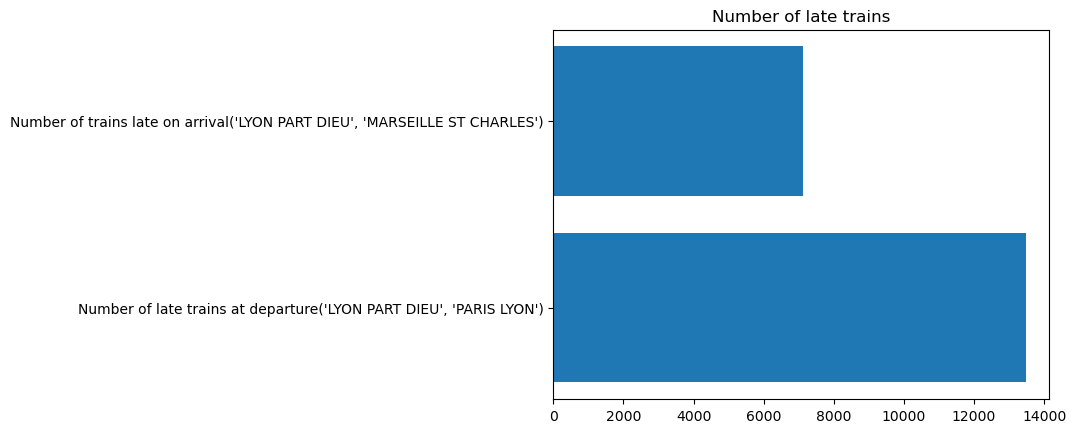

In [115]:
x_as = [max_numbers[0], max_numbers[3]]
y_as = [all_columns[0] + all_stations[0], all_columns[3] + all_stations[3]]
plt.barh(y_as, x_as)
plt.title('Number of late trains')

Text(0.5, 1.0, 'Average delay of trains')

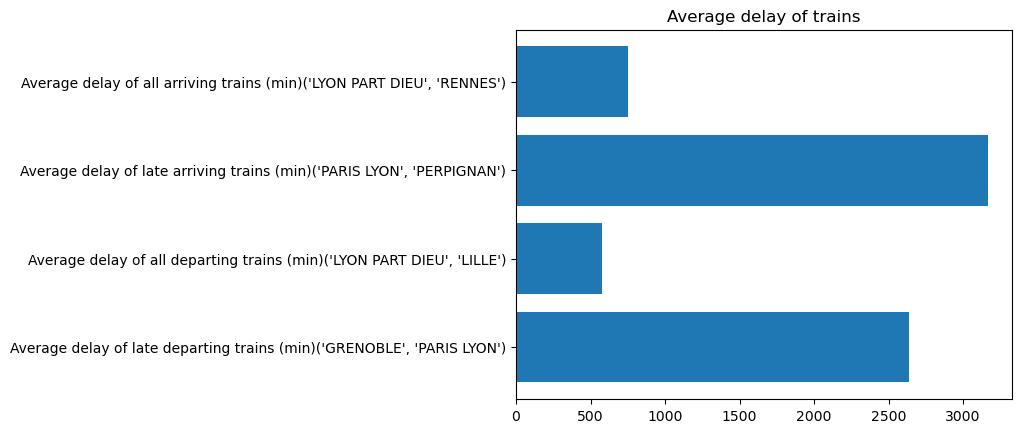

In [117]:
x_as = [max_numbers[1], max_numbers[2], max_numbers[4], max_numbers[5]]
y_as = [all_columns[1] + all_stations[1], all_columns[2] + all_stations[2], all_columns[4] + all_stations[4], all_columns[5] + all_stations[5]]
plt.barh(y_as, x_as)
plt.title('Average delay of trains')